In [1]:
from pymongo import MongoClient
import pprint

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time

In [2]:
client = MongoClient('localhost', 27017)

In [4]:
api_url = 'https://www.goodreads.com/search?page=1&q=Computer+Science&qid=iHFbTUVsHL&search_type=books&tab=books&utf8=%E2%9C%93'
r = requests.get(api_url)
r.status_code

200

In [5]:
import pprint
pprint.pprint(r.text[:1000])

('<!DOCTYPE html>\n'
 '<html class="desktop\n'
 '">\n'
 '<head>\n'
 '  <title>Search results for &quot;Computer Science&quot; (showing 1-20 of '
 '8772 books)</title>\n'
 '\n'
 "<meta content='Search results for Computer Science: , , , , , , , , , , , , "
 ", , , , , , , and ' name='description'>\n"
 "<meta content='telephone=no' name='format-detection'>\n"
 "<meta content='noindex' name='robots'>\n"
 '\n'
 '\n'
 '\n'
 '    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n'
 ' </script>\n'
 '  <script type="text/javascript">\n'
 '    var ue_mid = "A1PQBFHBHS6YH1";\n'
 '    var ue_sn = "www.goodreads.com";\n'
 '    var ue_furl = "fls-na.amazon.com";\n'
 '    var ue_sid = "710-4448579-1396217";\n'
 '    var ue_id = "VY05K88AK1T9Y4BH6X4N";\n'
 '\n'
 '    (function(e){var c=e;var '
 'a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new '
 'Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function '
 'd(h){return function(){a.q.push({n:h,a:arguments,

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
soup.select('table tr')[0]

In [ ]:
x = soup.find('table').find_all('tr')[17]

In [ ]:
x

In [ ]:
# author
x.find('a',{'class':'authorName'}).span.text

In [ ]:
# title
x.find('a',{'class':'bookTitle'}).span.text

In [ ]:
# average rating and rating counts
x.find('span',{'class':'greyText smallText uitext'}).span.text.strip()

In [ ]:
# edition
x.find('a',{'class':'greyText'}).text

In [ ]:
x.find('a','bookTitle')

In [ ]:
# 
get_url = x.find('a',{'class':'bookTitle'})
url = get_url.get('href')
'https://www.goodreads.com{}'.format(url)

In [ ]:
# average rating, total rating, publish year, edition
y = x.find('span',{'class':'greyText smallText uitext'}).text.replace('\n','')
y = ' '.join(y.split())
y = y.split(' — ')

In [ ]:
y[2]

In [ ]:
soup.find('table').find_all('tr')[17].text

In [ ]:
columns = {'book_title':None,
           'author_name':None,
           'avg_rating':None,
           'rating_count':None,
           'publish year':None,
           'edition':None,
           'link':None}

In [ ]:
soup.find('table').find_all('tr')

In [ ]:
for x in soup.find('table').find_all('tr'):
    print(x)
    break

In [ ]:
data = []
#for i in range(len(soup.find('table').find_all('tr'))):
for x in soup.find('table').find_all('tr'):
    columns = {}
    
    columns['book_title'] = x.find('a',{'class':'bookTitle'}).span.text
    columns['author_name'] = x.find('a',{'class':'authorName'}).span.text
    
    y = x.find('span',{'class':'greyText smallText uitext'}).text.replace('\n','')
    y = ' '.join(y.split())
    y = y.split(' — ')
    
    if len(y) == 4:
        columns['avg_rating'] = y[0]
        columns['rating_count'] = y[1]
        columns['publish year'] = y[2]
        columns['edition'] = y[3]
    else:
        columns['avg_rating'] = y[0]
        columns['rating_count'] = y[1]
        columns['publish year'] = None
        columns['edition'] = y[2]
          
    get_url = x.find('a',{'class':'bookTitle'})
    url = get_url.get('href')
    columns['link'] = 'https://www.goodreads.com{}'.format(url)
    
    print(columns)
    data.append(columns)

In [ ]:
data

In [87]:
db = client['book']
book_info = db['book_info']

In [ ]:
# book_info.collection.insertMany(data)

In [ ]:
for x in book_info.find({},{'_id':False}):
    print(x['link'])

In [ ]:
data = []
for i in range(1, 101):
    api_url = 'https://www.goodreads.com/search?page={}&q=Computer+Science&qid=iHFbTUVsHL&search_type=books&tab=books&utf8=%E2%9C%93'.format(i)
    r = requests.get(api_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    time.sleep(1)
    
    for x in soup.find('table').find_all('tr'):
        columns = {}

        columns['book_title'] = x.find('a',{'class':'bookTitle'}).span.text
        columns['author_name'] = x.find('a',{'class':'authorName'}).span.text

        y = x.find('span',{'class':'greyText smallText uitext'}).text.replace('\n','')
        y = ' '.join(y.split())
        y = y.split(' — ')

        if len(y) == 4:
            columns['avg_rating'] = y[0]
            columns['rating_count'] = y[1]
            columns['publish year'] = y[2]
            columns['edition'] = y[3]
        else:
            columns['avg_rating'] = y[0]
            columns['rating_count'] = y[1]
            columns['publish year'] = None
            columns['edition'] = y[2]

        get_url = x.find('a',{'class':'bookTitle'})
        url = get_url.get('href')
        columns['link'] = 'https://www.goodreads.com{}'.format(url)

        print(columns)
        data.append(columns)
    

In [ ]:
len(data)

In [ ]:
print(data[0:10])

In [ ]:
new_data = pd.DataFrame(data)
new_data.head()

In [ ]:
db = client['book']
book_info = db['book_info']

In [ ]:
book_info.insert_many(data)

In [ ]:
book_info.count()

In [ ]:
for x in book_info.find({},{'_id':False}):
    print(x['link'])

In [138]:
api_url = 'https://www.goodreads.com/book/show/26848002-computer-science-with-c-for-class-xi?from_search=true&from_srp=true&rank=6'
r = requests.get(api_url)
r.status_code

200

In [139]:
soup = BeautifulSoup(r.text, 'html.parser')

In [140]:
# title
soup.find('h1',{'class':'gr-h1 gr-h1--serif'}).text.strip()

'Computer Science with C++ for Class XI'

In [141]:
for x in soup.find_all('div',{'class':'authorName__container'}):
    print(x.find('a',{'class':"authorName"}).span.text)

Sumita Arora


In [142]:
# maybe more than 1 author
if len(soup.find_all('div',{'class':'authorName__container'})) >= 2:
    second_columns['author_name'] = []
    for x in soup.find_all('div',{'class':'authorName__container'}):
        second_columns['author_name'].append(x.find('a',{'class':"authorName"}).span.text)
else:
    second_columns['author_name'] = x.find('a',{'class':"authorName"}).span.text

In [143]:
second_columns

{'book_title': 'Computer Science: An Overview',
 'author_name': 'Sumita Arora',
 'avg_rating': 3.76,
 'rating_count': 22,
 'format': 'Paperback',
 'number_of_page': 599,
 'language': 'English',
 'ISBN': 'ISBN0321387015(ISBN13:9780321387011)'}

In [146]:
if second_columns['book_title'] in book_detail.find({'book_title':True}):
    print('it exist')
else:
    print("it doesn't exist")

it doesn't exist


In [ ]:
soup.find('div',{'class':"uitext stacked"})

In [3]:
import re

In [ ]:
float(soup.find('span',{'itemprop':"ratingValue"}).text.strip())

In [ ]:
soup.find('meta',{'itemprop':"ratingCount"}).text.replace('\n','').strip()

In [ ]:
rateCount = 0
for i in (re.findall(r'\d+', soup.find('meta',{'itemprop':"ratingCount"}).text.replace('\n','').strip())):
    rateCount = int(i)
print(rateCount)

In [ ]:
reviewCount = 0
for i in (re.findall(r'\d+', soup.find('meta',{'itemprop':"reviewCount"}).text.replace('\n','').strip())):
    reviewCount = int(i)
print(reviewCount)

In [ ]:
soup.find('span',{'itemprop':"bookFormat"}).text.replace('\n','').strip()

In [ ]:
soup.find('span',{'itemprop':"numberOfPages"}).text.replace('\n','').strip()

In [ ]:
numberOfPages = 0
for i in (re.findall(r'\d+', soup.find('span',{'itemprop':"numberOfPages"}).text.replace('\n','').strip())):
    numberOfPages = int(i)
print(numberOfPages)

In [ ]:
soup.find('div',{'itemprop':"inLanguage"}).text

In [ ]:
ISBN = ''
for idx, val in enumerate(soup.find('div',{'id':"bookDataBox"}).find_all('div',{'class':'clearFloats'})):
    val = val.text.replace('\n','').strip()
    val = val.replace(' ','')
    if 'ISBN' in val:
        ISBN += val
print(ISBN)

In [186]:
second_columns = {'book_title':None,
           'author_name':None,
           'avg_rating':None,
           'rating_count':None,
           'review_count':None,
           'format':None,
           'number_of_page':None,
           'language':None,
           'ISBN':None}

In [162]:
temp_list = []
for x in book_info.find({},{'_id':False}):
    temp_list.append(x['link'])

In [167]:
temp_list[:5]

['https://www.goodreads.com/book/show/533070.Computer_Science?from_search=true&from_srp=true&qid=iHFbTUVsHL&rank=21',
 'https://www.goodreads.com/book/show/8266079-multiple-choice-questions-in-computer-science?from_search=true&from_srp=true&qid=iHFbTUVsHL&rank=22',
 'https://www.goodreads.com/book/show/28131102-cambridge-international-as-and-a-level-computer-science-revision-guide?from_search=true&from_srp=true&qid=iHFbTUVsHL&rank=23',
 'https://www.goodreads.com/book/show/145058.Algorithms_on_Strings_Trees_and_Sequences?from_search=true&from_srp=true&qid=iHFbTUVsHL&rank=24',
 'https://www.goodreads.com/book/show/18245828-coding-the-matrix?from_search=true&from_srp=true&qid=iHFbTUVsHL&rank=25']

In [188]:
book_data = []
for x in temp_list:
    
    api_url = '{}'.format(x)
    r = requests.get(api_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    time.sleep(6)
    
    second_columns = {}
    
    second_columns['book_title'] = soup.find('h1',{'class':'gr-h1 gr-h1--serif'}).text.strip()
    
    if len(soup.find_all('div',{'class':'authorName__container'})) >= 2:
        second_columns['author_name'] = []
        for x in soup.find_all('div',{'class':'authorName__container'}):
            second_columns['author_name'].append(x.find('a',{'class':"authorName"}).span.text)
    else:
        for x in soup.find_all('div',{'class':'authorName__container'}):
            second_columns['author_name'] = x.find('a',{'class':"authorName"}).span.text
        
    second_columns['avg_rating'] = float(soup.find('span',{'itemprop':"ratingValue"}).text.strip())
    
    rateCount = 0
    for i in (re.findall(r'\d+', soup.find('meta',{'itemprop':"ratingCount"}).text.replace('\n','').strip())):
        rateCount = int(i)
        
    second_columns['rating_count'] = rateCount
    
    # second_columns['rating_count'] = soup.find('meta',{'itemprop':"ratingCount"}).text.replace('\n','').strip()
    
    reviewCount = 0
    for i in (re.findall(r'\d+', soup.find('meta',{'itemprop':"reviewCount"}).text.replace('\n','').strip())):
        reviewCount = int(i)
    
    second_columns['review_count'] = reviewCount
    
    # second_columns['review_count'] = soup.find('meta',{'itemprop':"reviewCount"}).text.replace('\n','').strip()
    
    try:
        second_columns['format'] = soup.find('span',{'itemprop':"bookFormat"}).text.replace('\n','').strip()
    except:
        second_columns['format'] = None
    
    try:   
        numberOfPages = 0
        for i in (re.findall(r'\d+', soup.find('span',{'itemprop':"numberOfPages"}).text.replace('\n','').strip())):
            numberOfPages = int(i)
        second_columns['number_of_page'] = numberOfPages
        # soup.find('span',{'itemprop':"numberOfPages"}).text.replace('\n','').strip()
    except:
        second_columns['number_of_page'] = None

    try:
        second_columns['language'] = soup.find('div',{'itemprop':"inLanguage"}).text
    except:
        second_columns['language'] = None
    
    ISBN = ''
    for idx, val in enumerate(soup.find('div',{'id':"bookDataBox"}).find_all('div',{'class':'clearFloats'})):
        val = val.text.replace('\n','').strip()
        val = val.replace(' ','')
        if 'ISBN' in val:
            ISBN += val
    second_columns['ISBN'] = ISBN

    book_data.append(second_columns)
    
    # do a search if it exist
    if len(list(book_detail.find({'book_title':soup.find('h1',{'class':'gr-h1 gr-h1--serif'}).text.strip()}))):
        continue
    else:
        book_detail.insert_one(second_columns)

In [177]:
if len(list(book_detail.find({'book_title':'Computer Science With Python (textbook XII)'}))) > 0:
    print('it exist')
else:
    print("it doesn't exist")

it exist


In [ ]:
book_data[:21]

In [154]:
if len(list(book_detail.find({'book_title':''}))) > 0:
else:

it exist


In [4]:
client.list_database_names()

['admin', 'book', 'config', 'local']

In [183]:
db.book_detail.drop()

In [184]:
db = client['book']
book_detail = db['book_detail']

In [185]:
book_detail.estimated_document_count()

0

In [113]:
list(book_detail.find({},{'_id':False}).limit(10))

[{'book_title': 'Computer Science: An Overview',
  'author_name': 'J. Glenn Brookshear',
  'avg_rating': 3.76,
  'rating_count': 22,
  'format': 'Paperback',
  'number_of_page': 599,
  'language': 'English',
  'ISBN': 'ISBN0321387015(ISBN13:9780321387011)'},
 {'book_title': 'Multiple Choice Questions in Computer Science',
  'author_name': 'Ela Kumar',
  'avg_rating': 3.62,
  'rating_count': 9,
  'format': None,
  'number_of_page': 472,
  'ISBN': 'ISBN819067577X(ISBN13:9788190675772)'},
 {'book_title': 'Cambridge International as and a Level Computer Science Revision Guide',
  'author_name': 'Tony Piper',
  'avg_rating': 4.29,
  'rating_count': 4,
  'format': None,
  'number_of_page': 328,
  'ISBN': 'ISBN1107547547(ISBN13:9781107547544)'},
 {'book_title': 'Algorithms on Strings, Trees and Sequences: Computer Science and Computational Biology',
  'author_name': 'Dan Gusfield',
  'avg_rating': 4.09,
  'rating_count': 4,
  'format': 'Hardcover',
  'number_of_page': 556,
  'language': 'Engl

In [ ]:
df = pd.DataFrame(book_detail.find({},{'_id':False}))

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_title      40 non-null     object 
 1   author_name     40 non-null     object 
 2   avg_rating      40 non-null     float64
 3   rating_count    40 non-null     int64  
 4   format          21 non-null     object 
 5   number_of_page  36 non-null     float64
 6   language        21 non-null     object 
 7   ISBN            40 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ KB


In [116]:
df.describe()

,avg_rating,rating_count,number_of_page
count,40.000000,40.000000,36.000000
mean,3.868750,6.450000,423.638889
std,0.350086,4.776814,218.193119
min,2.500000,0.000000,84.000000
25%,3.710000,4.000000,236.750000
50%,3.925000,5.000000,436.000000
75%,4.102500,9.000000,566.750000
max,4.290000,22.000000,832.000000


In [8]:
df.head(10)

,book_title,author_name,avg_rating,rating_count,format,number_of_page,language,ISBN
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011)
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,9,None,472.0,NaN,ISBN819067577X(ISBN13:9788190675772)
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,4,None,328.0,NaN,ISBN1107547547(ISBN13:9781107547544)
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194)
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735)
5,Computer Science: An Overview,J. Glenn Brookshear,3.76,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011)
6,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,9,None,472.0,NaN,ISBN819067577X(ISBN13:9788190675772)
7,Cambridge International as and a Level Compute...,Tony Piper,4.29,4,None,328.0,NaN,ISBN1107547547(ISBN13:9781107547544)
8,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194)
9,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735)


In [9]:
df.tail(5)

,book_title,author_name,avg_rating,rating_count,format,number_of_page,language,ISBN
40,Computer Science: A Breadth-First Approach with C,Paul Nagin,3.71,5,Hardcover,768.0,English,ISBN0471585521(ISBN13:9780471585527)
41,Python for Data Science: A Crash Course for Da...,Computer Science Academy,2.50,0,None,147.0,NaN,
42,English for Computer Science,Norma D. Mullen,3.71,1,None,241.0,NaN,
43,Quantum Computer Science,N. David Mermin,3.63,5,Hardcover,220.0,English,ISBN0521876583(ISBN13:9780521876582)
44,Click Start Level 8: Computer Science for Schools,Shalini Harisukh,4.08,2,None,84.0,NaN,ISBN1107537592(ISBN13:9781107537590)


In [117]:
print(len(df))
df = df.drop_duplicates(subset=['book_title'])
print(len(df))

40
22


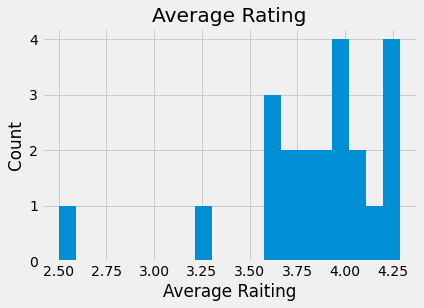

In [123]:
fig, ax = plt.subplots()
ax.hist(df['avg_rating'], bins=20);
plt.title("Average Rating")
plt.xlabel('Average Raiting')
plt.ylabel('Count');

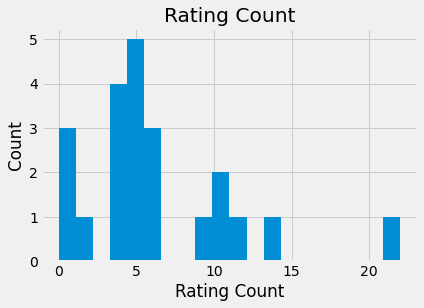

In [119]:
fig, ax = plt.subplots()
ax.hist(df['rating_count'], bins=20);
plt.title("Rating Count")
plt.xlabel('Rating Count')
plt.ylabel('Count');

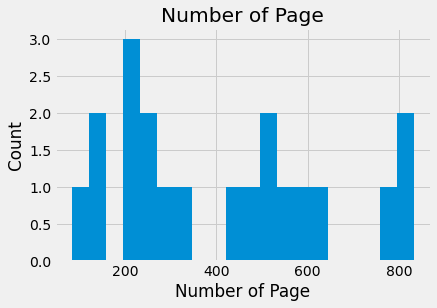

In [18]:
fig, ax = plt.subplots()
ax.hist(df['number_of_page'].dropna(), bins=20);
plt.title("Number of Page")
plt.xlabel('Number of Page')
plt.ylabel('Count');

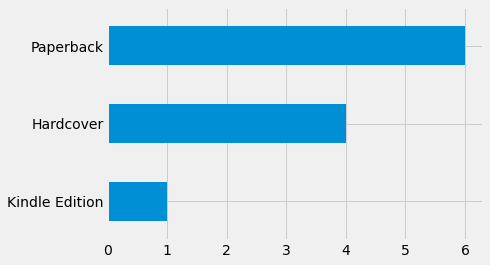

In [120]:
df['format'].value_counts().sort_values(ascending=True).plot(kind='barh');